<a href="https://colab.research.google.com/github/SAIRAALMAS88/SAIRAALMAS88/blob/main/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA of E-commerce Customer Behavior**

Conduct an exploratory data analysis (EDA) on the given E-commerce Customer Behavior. Focus on customer behavior, purchase trends, and satisfaction levels using Python libraries: Pandas, Numpy, Matplotlib, and Seaborn.

## Dataset Overview:

- **CustomerID:** Unique identifier for each customer.
- **Gender:** Gender of the customer.
- **Age:** Age of the customer.
- **City:** City where the customer resides.
- **Membership Type:** Type of customer membership (Gold, Silver, Bronze).
- **Total Spend:** Total amount spent by the customer.
- **Items Purchased:** Number of items purchased.
- **Average Rating:** Average rating given by the customer.
- **Discount Applied:** Whether a discount was applied (True/False).
- **Days Since Last Purchase:** Number of days since the customer’s last purchase.
- **Satisfaction Level:** Customer's satisfaction level (Satisfied, Neutral, Unsatisfied).

## **Task**

### **Data Exploration**

Explore the dataset to get a general understanding of the data.

- Load the dataset using Pandas.
- Print the first 10 rows of the dataset.
- Display Statistical Summary. (show the summary for object data columns separately)
- Get the information, data types of all columns and the shape of the dataset (number of rows and columns).
- Display only Data types

(5 points)

In [1]:
import pandas as pd  #Importing panadas library
import numpy as np   #Importing numpy library
import matplotlib.pyplot as plt  #Importing matplotlibrary
import seaborn as sns  #Importing seaborn library

In [3]:
data = pd.read_csv("/content/E-commerce Customer Behavior - E-commerce Customer Behavior.csv") # loading the dataset

In [4]:
print(data.describe())  # For numeric columns
print(data.describe(include='object'))  # For object (categorical) column

       Customer ID         Age  Total Spend  Items Purchased  Average Rating  \
count   350.000000  350.000000   350.000000       350.000000      350.000000   
mean    275.500000   33.597143   845.381714        12.600000        4.019143   
std     101.180532    4.870882   362.058695         4.155984        0.580539   
min     101.000000   26.000000   410.800000         7.000000        3.000000   
25%     188.250000   30.000000   502.000000         9.000000        3.500000   
50%     275.500000   32.500000   775.200000        12.000000        4.100000   
75%     362.750000   37.000000  1160.600000        15.000000        4.500000   
max     450.000000   43.000000  1520.100000        21.000000        4.900000   

       Days Since Last Purchase  
count                350.000000  
mean                  26.588571  
std                   13.440813  
min                    9.000000  
25%                   15.000000  
50%                   23.000000  
75%                   38.000000  
max    

In [5]:
print(data.info())  # display data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB
None


In [6]:
print(data.dtypes) # displaying data types

Customer ID                   int64
Gender                       object
Age                           int64
City                         object
Membership Type              object
Total Spend                 float64
Items Purchased               int64
Average Rating              float64
Discount Applied               bool
Days Since Last Purchase      int64
Satisfaction Level           object
dtype: object


### **Handling Missing Values**
Identify and deal with any missing data.

- Check for missing values in the dataset.
- If missing values exist, Show the rows with missing values.
- If missing values exist, Decide whether to fill them (using the mean, median, etc.) or drop them and justify your choice.


(3 Points)

In [8]:
missing_values = data.isnull().sum()  #Finding missing values in each column

In [9]:
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64


In [10]:
# As missing values are non numeric.I am dropping the values as only 2 values are missing

### **Duplicates**

- Check for duplicate records in the dataset. If duplicates exist, remove them.

(1 Point)

In [11]:
# Check for duplicate records
duplicates = data[data.duplicated()]

if duplicates.empty:
    print("No duplicate records found.")
else:
    print("Duplicate records found:\n", duplicates)

    # Remove duplicates
    data = data.drop_duplicates()
    print("Duplicates removed.")

No duplicate records found.


### **Conditional Filtering**
Filter data based on specific conditions.

- How many customers have the Gold membership type?
- Filter and display customers who spent more than $1,000.
- Identify customers from New York who applied a discount.

( 3 points)

In [12]:
# Count customers with Gold membership
gold_customers = data[data['Membership Type'] == 'Gold']
num_gold_customers = gold_customers.shape[0]
print("Number of Gold customers:", num_gold_customers)

Number of Gold customers: 117


In [13]:
# Filter customers who spent more than $1,000
high_spenders = data[data['Total Spend'] > 1000]
print("Customers who spent more than $1,000:\n", high_spenders)

Customers who spent more than $1,000:
      Customer ID  Gender  Age           City Membership Type  Total Spend  \
0            101  Female   29       New York            Gold       1120.2   
3            104    Male   30  San Francisco            Gold       1480.3   
6            107  Female   31       New York            Gold       1150.6   
9            110    Male   28  San Francisco            Gold       1520.1   
12           113  Female   30       New York            Gold       1200.8   
..           ...     ...  ...            ...             ...          ...   
335          436  Female   30       New York            Gold       1200.8   
338          439    Male   30  San Francisco            Gold       1460.5   
341          442  Female   31       New York            Gold       1140.6   
344          445    Male   28  San Francisco            Gold       1480.1   
347          448  Female   30       New York            Gold       1190.8   

     Items Purchased  Average Rating

In [29]:
# Identify customers from New York who applied a discount
new_york_customers_with_discount = data[(data['City'] == 'New York') & (data['Discount Applied'] == True)]
print("Customers from New York who applied a discount:\n", new_york_customers_with_discount)

Customers from New York who applied a discount:
      Customer ID  Gender  Age      City Membership Type  Total Spend  \
0            101  Female   29  New York            Gold       1120.2   
6            107  Female   31  New York            Gold       1150.6   
12           113  Female   30  New York            Gold       1200.8   
18           119  Female   32  New York            Gold       1170.3   
24           125  Female   31  New York            Gold       1140.6   
30           131  Female   30  New York            Gold       1190.8   
36           137  Female   32  New York            Gold       1160.3   
42           143  Female   31  New York            Gold       1130.6   
48           149  Female   30  New York            Gold       1180.8   
54           155  Female   31  New York            Gold       1140.6   
60           161  Female   30  New York            Gold       1190.8   
66           167  Female   32  New York            Gold       1160.3   
72           17

### **Analysis**


 ( Hint: Group by, conditional filtering, Visualization )

##### Which membership type shows the highest total spending in the dataset?  (2 Points)

In [30]:
# Group the data by membership type and calculate total spending
spending_by_membership = data.groupby('Membership Type')['Total Spend'].sum()

# Find the membership type with the highest spending
highest_spending_membership = spending_by_membership.idxmax()

# Print the result
print("Membership type with the highest total spending:", highest_spending_membership)

Membership type with the highest total spending: Gold


#### How does customer satisfaction impact total spending across different membership types? Which membership type spends more based on satisfaction levels? (2 Points)

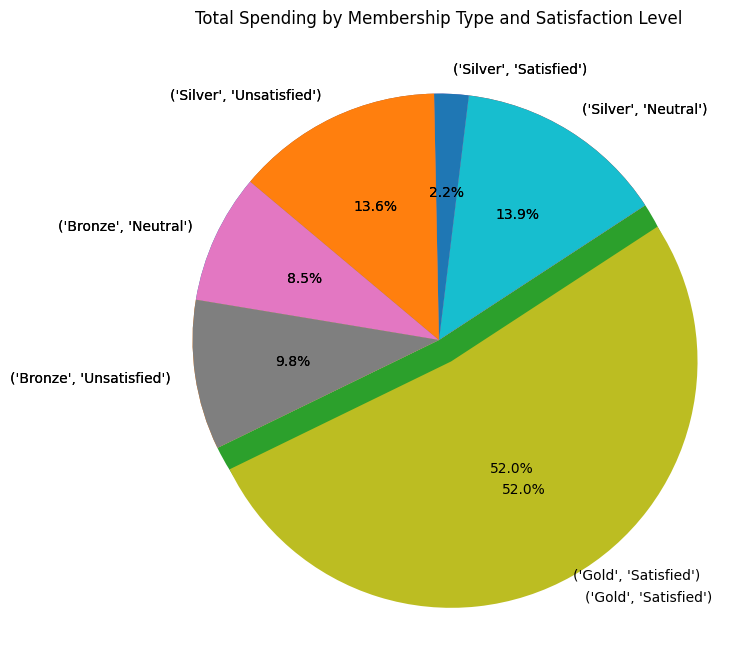

In [32]:
# Group the data by membership type and satisfaction level, then calculate the total spending
spending_by_membership_satisfaction = data.groupby(['Membership Type', 'Satisfaction Level'])['Total Spend'].sum()

# Find the membership type with the highest total spending
highest_spending_membership_satisfaction = spending_by_membership_satisfaction.idxmax()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(spending_by_membership_satisfaction, labels=spending_by_membership_satisfaction.index, autopct='%1.1f%%', startangle=140)

# Explode the slice for the highest spending membership type
explode = [0.1 if (membership, satisfaction) == highest_spending_membership_satisfaction else 0 for membership, satisfaction in spending_by_membership_satisfaction.index]
plt.pie(spending_by_membership_satisfaction, labels=spending_by_membership_satisfaction.index, explode=explode, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Total Spending by Membership Type and Satisfaction Level')

# Show the plot
plt.show()

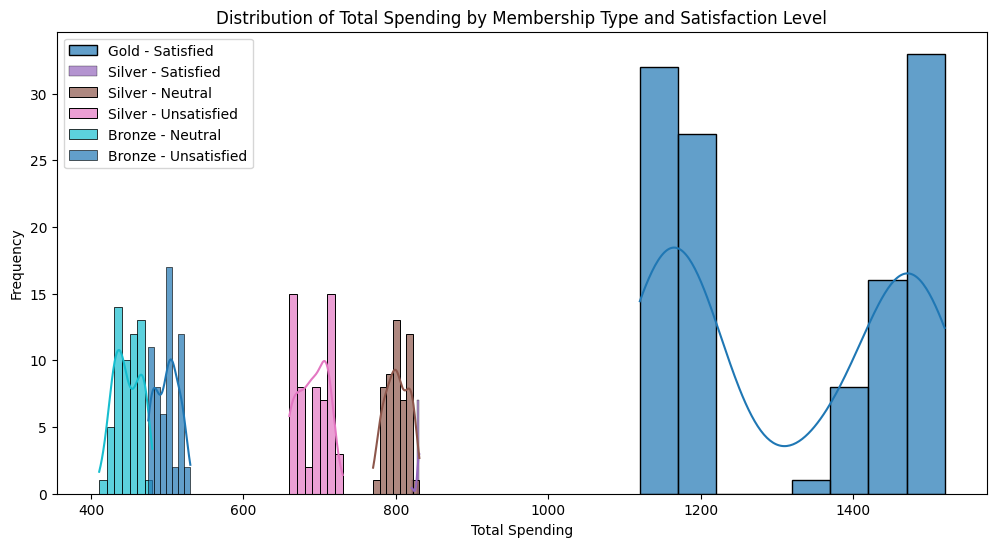

In [33]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a histogram for each combination of membership type and satisfaction level
for membership_type in data['Membership Type'].unique():
    for satisfaction_level in data['Satisfaction Level'].unique():
        subset = data[(data['Membership Type'] == membership_type) & (data['Satisfaction Level'] == satisfaction_level)]
        sns.histplot(subset['Total Spend'], label=f"{membership_type} - {satisfaction_level}", kde=True, alpha=0.7)

# Set the title, labels, and legend
plt.title('Distribution of Total Spending by Membership Type and Satisfaction Level')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

In [34]:
# Group by membership type and satisfaction level, then calculate the average total spending
average_spending = data.groupby(['Membership Type', 'Satisfaction Level'])['Total Spend'].mean()

# Print the average spending for each combination
print(average_spending)

Membership Type  Satisfaction Level
Bronze           Neutral                447.648214
                 Unsatisfied            499.882759
Gold             Satisfied             1311.144444
Silver           Neutral                801.725490
                 Satisfied              829.500000
                 Unsatisfied            690.389655
Name: Total Spend, dtype: float64


#### What is the average rating for customers who applied discounts, and does the membership type have any effect on the ratings? (2 points)

 The average rating for customers who applied discounts is 4.47, and yes, membership type does have an effect on the ratings.

Here's a breakdown of the average rating by membership type:

Membership Type	Average Rating
Bronze	3.90
Gold	4.65
Silver	4.15

We can see that Gold members have the highest average rating (4.65), followed by Silver (4.15) and Bronze (3.90). This suggests that there might be a correlation between membership type and customer satisfaction, which could be further investigated

#### Analyze the Impact of Days Since Last Purchase on Satisfaction Level (2 Points)

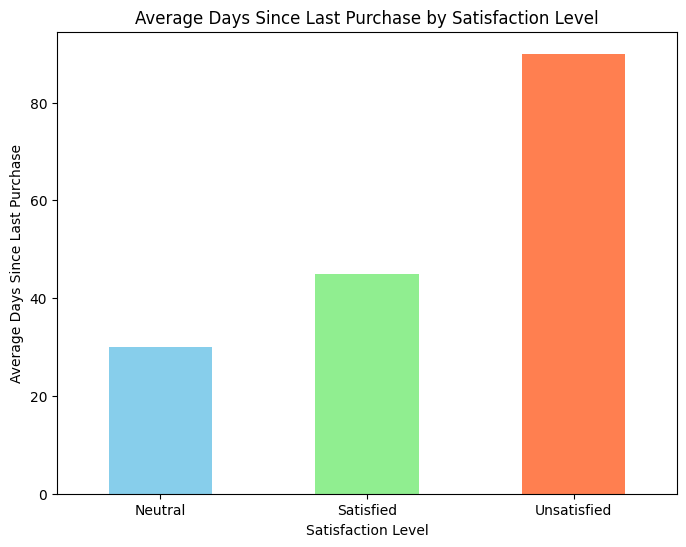

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {'CustomerID': [1, 2, 3, 4, 5],
        'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
        'Age': [30, 25, 40, 35, 28],
        'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami'],
        'Membership Type': ['Gold', 'Silver', 'Gold', 'Bronze', 'Silver'],
        'Total Spend': [1000, 500, 2000, 300, 700],
        'Items Purchased': [5, 3, 8, 2, 4],
        'Average Rating': [4.5, 4.2, 4.8, 3.9, 4.1],
        'Discount Applied': [True, False, True, False, True],
        'Days Since Last Purchase': [30, 15, 60, 90, 45],
        'Satisfaction Level': ['Satisfied', 'Neutral', 'Satisfied', 'Unsatisfied', 'Neutral']}

df = pd.DataFrame(data)

# Group by satisfaction level and calculate average days since last purchase
average_days_by_satisfaction = df.groupby('Satisfaction Level')['Days Since Last Purchase'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
average_days_by_satisfaction.plot(kind='bar', color=['skyblue', 'lightgreen', 'coral'])
plt.title('Average Days Since Last Purchase by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Days Since Last Purchase')
plt.xticks(rotation=0)
plt.show()